In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random

**Load Images and Labels**

In [3]:
#Load array containing all images
images_list = np.load('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/images/leftcolumn_ordered1.npz')
images = images_list['a']
print(images.shape)

images_list = np.load('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/images/leftcolumn_ordered2.npz')
images2 = images_list['a']
print(images2.shape)

images_list = np.load('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/images/leftcolumn_ordered3.npz')
images3 = images_list['a']
print(images3.shape)

images = np.vstack((images, images2))
images = np.vstack((images, images3))

# for image in range (0, len(images), 5000):
# # for image in range (50000, 70000, 2000):
#   print(image)
#   plt.imshow(images[image])
#   plt.show()

(141750, 23, 115)
(141750, 23, 115)
(141750, 23, 115)


In [4]:
#Load array containing all labels
labels_list = np.load('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/labels/leftcolumn_ordered1.npz')
labels = labels_list['a']
print(labels.shape)

labels_list = np.load('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/labels/leftcolumn_ordered2.npz')
labels2 = labels_list['a']
print(labels2.shape)

labels_list = np.load('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/labels/leftcolumn_ordered3.npz')
labels3 = labels_list['a']
print(labels3.shape)

labels = np.vstack((labels, labels2))
labels = np.vstack((labels, labels3))

# for i in range (0, len(labels), 5000):
# # for i in range (50000, 70000, 2000):
#   plt.imshow(labels[i])
#   plt.show()

(141750, 11, 1)
(141750, 11, 1)
(141750, 11, 1)


#**Normalise**

**Find min and max of images and labels**

In [5]:
# Find min of inputs and labels
final_min = min(np.min(images), np.min(labels))
print(final_min)


-7.546365e-08


In [6]:
# Find max of inputs and labels
final_max = max(np.max(images), np.max(labels))
print(final_max)


8.9908006e-08


**Normalise data**

In [7]:
norm_inputs = (images - final_min) / (final_max - final_min)
print(norm_inputs.shape)
print(np.min(norm_inputs), np.max(norm_inputs))

(425250, 23, 115)
0.0 1.0


In [8]:
norm_labels = (labels - np.min(labels)) / (np.max(labels) - np.min(labels)) #using overall min/max
print(norm_labels.shape)
print(np.min(norm_labels), np.max(norm_labels))

(425250, 11, 1)
0.0 1.0


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/norm_inputs', norm_inputs)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/norm_labels', norm_labels)

**Save 2 arrays into an array**

In [9]:
dataset = np.asarray(list(zip(norm_inputs[350*270:525*270], norm_labels[350*270:525*270])))
dataset2 = np.asarray(list(zip(norm_inputs[525*270+350*270:525*270*2], norm_labels[525*270+350*270:525*270*2])))
dataset3 = np.asarray(list(zip(norm_inputs[525*270*2+350*270:525*270*3], norm_labels[525*270*2+350*270:525*270*3])))

print(dataset.shape)
dataset = np.vstack((dataset, dataset2))
print(dataset.shape)
dataset = np.vstack((dataset, dataset3))

print(dataset.shape)

(47250, 2)
(94500, 2)
(141750, 2)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [10]:
print(dataset.shape)

(141750, 2)


In [11]:
wavedataset = dataset

In [12]:
labels = wavedataset[:,1]
wall=[]
for i in range(0,len(labels),270):
  wall.append(labels[i:i+270].squeeze())

print(len(wall))

reshaped_walls = np.zeros((175*3,270,11))
for i in range(175*3):
  for j in range(270):
    for k in range(11):
      reshaped_walls[i,j,k] = wall[i][j][k].squeeze()

print(len(reshaped_walls))

525
525


0


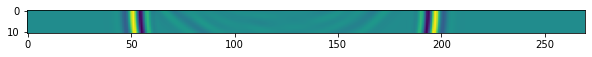

50


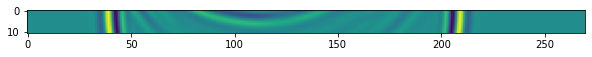

100


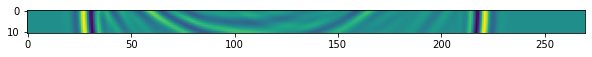

150


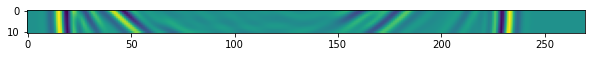

200


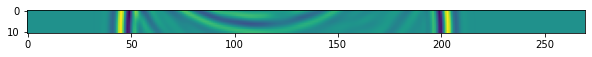

250


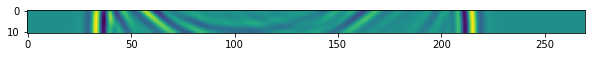

300


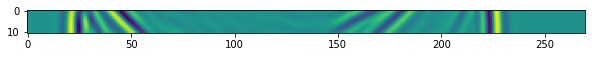

350


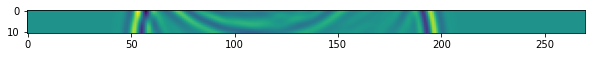

400


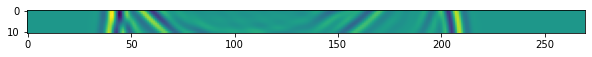

450


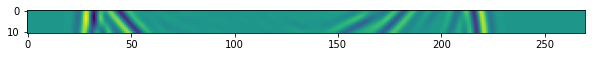

500


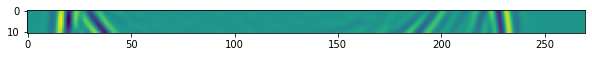

In [13]:
for i in range(0,len(reshaped_walls),50):
  print(i)
  plt.figure(figsize=(10,10))
  plt.imshow(np.rot90(reshaped_walls[i]))
  plt.show()

In [15]:
# # Augment data and shuffle
# h_flip_images = []
# h_flip_labels = []
# v_flip_images = []
# v_flip_labels = []
# hv_flip_images = []
# hv_flip_labels = []
# shuffle_array = wavedataset.reshape(-1, 2, 30)
# for i in range(len(shuffle_array)):
#   h_flip_images_block = []
#   h_flip_labels_block = []
#   v_flip_images_block = []
#   v_flip_labels_block = []
#   hv_flip_images_block = []
#   hv_flip_labels_block = []
#   for j in range(30):
#     h_flip_images_block.append(np.fliplr(shuffle_array[i, 0, j]))
#     h_flip_labels_block.append(np.fliplr(shuffle_array[i, 1, j]))
#     v_flip_images_block.append(np.flipud(shuffle_array[i, 0, j]))
#     v_flip_labels_block.append(np.flipud(shuffle_array[i, 1, j]))
#     hv_flip_images_block.append(np.fliplr(np.flipud(shuffle_array[i, 0, j])))
#     hv_flip_labels_block.append(np.fliplr(np.flipud(shuffle_array[i, 1, j])))
  
#   h_flip_images.append(h_flip_images_block)
#   h_flip_labels.append(h_flip_labels_block)
#   v_flip_images.append(v_flip_images_block)
#   v_flip_labels.append(v_flip_labels_block)
#   hv_flip_images.append(hv_flip_images_block)
#   hv_flip_labels.append(hv_flip_labels_block)

# h_flip_data = np.asarray(list(zip(h_flip_images, h_flip_labels)))
# v_flip_data = np.asarray(list(zip(v_flip_images, v_flip_labels)))
# hv_flip_data = np.asarray(list(zip(hv_flip_images, hv_flip_labels)))

# print('sh shape ', shuffle_array.shape)
# print('h shape ', h_flip_data.shape)
# print('v shape ', v_flip_data.shape)
# print('hv shape ', hv_flip_data.shape)

# shuffle_array = np.vstack((shuffle_array, h_flip_data))
# print(shuffle_array.shape)

# shuffle_array = np.vstack((shuffle_array, v_flip_data))
# print(shuffle_array.shape)

# shuffle_array = np.vstack((shuffle_array, hv_flip_data))
# print(shuffle_array.shape)

shuffle_array = wavedataset.reshape(-1, 2, 30)
random.shuffle(shuffle_array)
wavedataset = shuffle_array.reshape(-1, 2)
print(wavedataset.shape)


(141750, 2)


**Split into test, train, val data**

In [16]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(wavedataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

n = len(wavedataset)

for a, [samples, labels] in enumerate(wavedataset):

    if a < 17760:
        test_data.append([samples, labels])
    else:
        training_data.append([samples, labels])

        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(123990, 2)
(0,)
(17760, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [17]:
twenty_training_data = training_data

Train 0


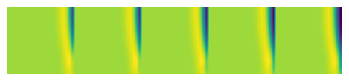

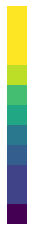

Train 15000


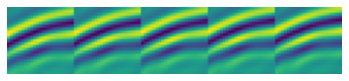

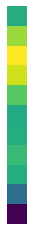

Train 30000


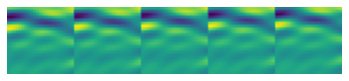

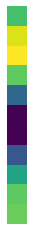

Train 45000


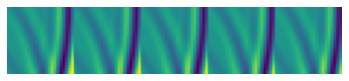

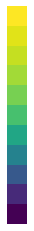

Train 60000


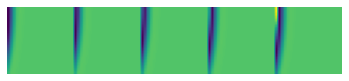

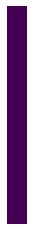

Train 75000


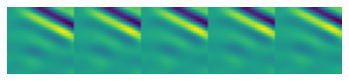

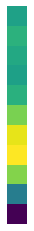

Train 90000


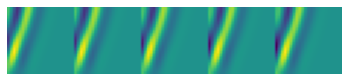

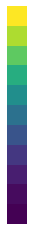

Train 105000


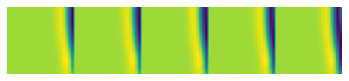

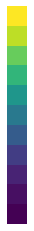

Train 120000


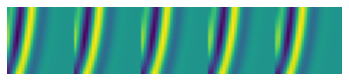

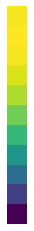

In [19]:
for i in range (0, len(training_data), 15000):
  print('Train ' + str(i))
  plt.axis('off')
  plt.imshow(twenty_training_data[i][0])
  plt.show()
  plt.axis('off')
  plt.imshow(twenty_training_data[i][1])
  plt.show()

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/sixties_twenty_training_data', twenty_training_data)

In [20]:
twenty_test_data = test_data

Test 0


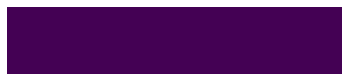

Test 5000


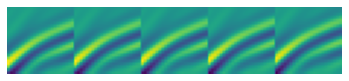

Test 10000


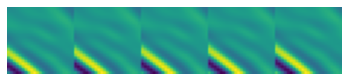

Test 15000


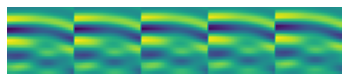

In [22]:
for i in range (0,len(twenty_test_data),5000):
  print('Test ' + str(i))
  plt.axis('off')
  plt.imshow(twenty_test_data[i][0])
  plt.show()

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/sixties_twenty_test_data', twenty_test_data)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
train_imgs = []
train_labs = []

for i in range (0, len(twenty_training_data), 1):
  train_imgs.append(twenty_training_data[i][0])
  train_labs.append(twenty_training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/sixties_twenty_training_dataset', train_imgs, train_labs)